## Define augment function

In [2]:
import cv2

In [183]:
def put_food_into_screen(food, screen):
    # Read images
    img1 = cv2.imread(screen)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(food)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    # Get mask
    alpha = cv2.imread(screen, cv2.IMREAD_UNCHANGED)[:, :, 3]
    alpha = (1-np.clip(alpha, 0, 1)) * 255

    # Find bounding box stats of masked area
    numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(alpha)

    max_label = 1
    max_area = 0

    for label in range(1, num_labels):
        area = np.sum(labels == label)

        if area > max_area:
            max_area = area
            max_label = label

    x = stats[max_label, cv2.CC_STAT_LEFT]
    y = stats[max_label, cv2.CC_STAT_TOP]
    w = stats[max_label, cv2.CC_STAT_WIDTH]
    h = stats[max_label, cv2.CC_STAT_HEIGHT]

    # Resize image to mask area
    img2 = cv2.resize(img2, (w, h))

    # Pad image
    top = y
    bottom = 640 - (y + h)
    left = x
    right = 640 - (x + w)

    img2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    
    # Merge images
    img1[alpha == 255] = 0
    img2[alpha != 255] = 0
    result = cv2.add(img1, img2)
    
    return result

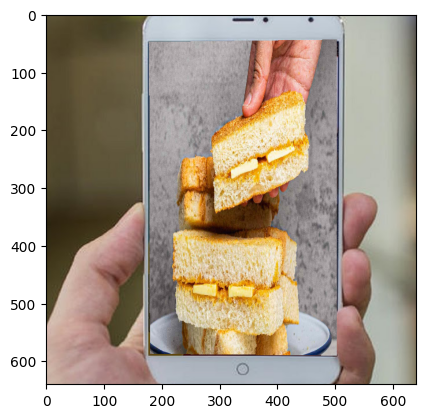

In [184]:
plt.imshow(put_food_into_screen('../data/in/kaya_toast/kayatoast0.jpeg', '../data/screen/phone_screen_3.png'))

## Create training dataset

In [185]:
screen_types = ['phone_screen', 'tablet', 'desktop', 'laptop']

In [209]:
import json

with open('../data/train_food.json', 'r') as file:
    data = json.load(file)

In [210]:
import random
random.seed(42)
random.shuffle(data)

In [211]:
mp = dict()

for i in data:
    if i['class'] not in mp:
        mp[i['class']] = []
    
    if len(mp[i['class']]) < 8:
        mp[i['class']].append(i['path'])

In [189]:
augmented = []

for i in mp:
    cur = 0
    for j in screen_types:
        sampled = random.sample(range(1, 6), 2)
        
        screen_1 = f'../data/screen/{j}_{sampled[0]}.png'
        screen_2 = f'../data/screen/{j}_{sampled[1]}.png'
        
        augmented.append(put_food_into_screen('../data/' + mp[i][cur], screen_1))
        augmented.append(put_food_into_screen('../data/' + mp[i][cur+1], screen_2))
        cur += 2

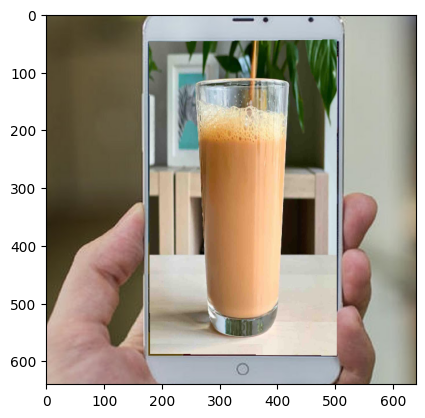

In [200]:
plt.imshow(augmented[120])

In [206]:
for idx, i in enumerate(augmented):
    cv2.imwrite(f'../data/out/screens/screens_{idx}.jpg', cv2.cvtColor(i, cv2.COLOR_RGB2BGR))

## Create testing dataset

In [214]:
screen_types = ['phone_screen', 'tablet', 'desktop', 'laptop']

In [212]:
import json

with open('../data/test_food.json', 'r') as file:
    data = json.load(file)

In [213]:
import random
random.seed(42)
random.shuffle(data)

In [215]:
mp = dict()

for i in data:
    if i['class'] not in mp:
        mp[i['class']] = []
    
    if len(mp[i['class']]) < 4:
        mp[i['class']].append(i['path'])

In [217]:
augmented = []

for i in mp:
    cur = 0
    for j in screen_types:
        sampled = random.sample(range(6, 9), 1)
        
        screen_1 = f'../data/screen/{j}_{sampled[0]}.png'
        
        augmented.append(put_food_into_screen('../data/' + mp[i][cur], screen_1))
        
        cur += 1

In [219]:
for idx, i in enumerate(augmented):
    cv2.imwrite(f'../data/out/screens/screens_{idx+240}.jpg', cv2.cvtColor(i, cv2.COLOR_RGB2BGR))